# EXERCÍCIO

Nas aulas anteriores você aprendeu a dividir a base de dados entre treinamento e teste para avaliar os algoritmos de classificação. Porém, existe uma outra técnica que é mais utilizada no meio científico, que é a validação cruzada. Na próxima aula, você terá uma breve introdução teórica a esta técnica

O objetivo deste exercício é aplicar a validação cruzada e comparar os resultados com a abordagem de treinamento e teste. Acesse [aqui](https://scikit-learn.org/stable/modules/cross_validation.html) a documentação do sklearn para entender melhor sobre a implementação

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats

from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, KFold

In [2]:
df = pd.read_csv('CSVs/credit_data.csv')
df.shape

(2000, 5)

In [3]:
df.dropna(inplace=True)
df.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [4]:
X = df.iloc[:, 1:4].values
X

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [5]:
y = df.iloc[:,4].values
y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [6]:
from Models.Stats import Stats
cls_stats = Stats()

In [7]:
results_nb = []
results_lr = []
results_rf = []

for i in range(30):
    
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=i)

    nb = GaussianNB()
    clf_nb = make_pipeline(preprocessing.StandardScaler(), nb)
    scores_nb = cross_val_score(clf_nb, X, y, cv=cv, scoring='accuracy')
    results_nb.append(cls_stats.mean(scores_nb))
    
    lr = LogisticRegression()
    clf_lr = make_pipeline(preprocessing.StandardScaler(), lr)
    scores_lr = cross_val_score(clf_lr, X, y, cv=cv, scoring='accuracy')
    results_lr.append(cls_stats.mean(scores_lr))

    rf = RandomForestClassifier(criterion='entropy')
    clf_rf = make_pipeline(preprocessing.StandardScaler(), rf)
    scores_rf = cross_val_score(clf_rf, X, y, cv=cv, scoring='accuracy')
    results_rf.append(cls_stats.mean(scores_rf))

In [8]:
results_nb_kfold = []
results_lr_kfold = []
results_rf_kfold = []

for i in range(30):
    
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)

    nb_kfold = GaussianNB()
    clf_nb_kfold = make_pipeline(preprocessing.StandardScaler(), nb_kfold)
    scores_nb_kfold = cross_val_score(clf_nb_kfold, X, y, cv=kfold, scoring='accuracy')
    results_nb_kfold.append(cls_stats.mean(scores_nb_kfold))
    
    lr_kfold = LogisticRegression()
    clf_lr_kfold = make_pipeline(preprocessing.StandardScaler(), lr_kfold)
    scores_lr_kfold = cross_val_score(clf_lr_kfold, X, y, cv=kfold, scoring='accuracy')
    results_lr_kfold.append(cls_stats.mean(scores_lr_kfold))

    rf_kfold = RandomForestClassifier(criterion='entropy')
    clf_rf_kfold = make_pipeline(preprocessing.StandardScaler(), rf_kfold)
    scores_rf_kfold = cross_val_score(clf_rf_kfold, X, y, cv=kfold, scoring='accuracy')
    results_rf_kfold.append(cls_stats.mean(scores_rf_kfold))

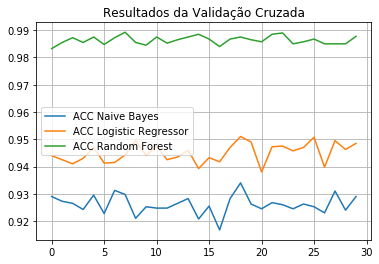

In [9]:
plt.plot(list(range(0, 30)), results_nb, label='ACC Naive Bayes')
plt.plot(list(range(0, 30)), results_lr, label='ACC Logistic Regressor')
plt.plot(list(range(0, 30)), results_rf, label='ACC Random Forest')
plt.title('Resultados da Validação Cruzada')
plt.legend()
plt.grid();

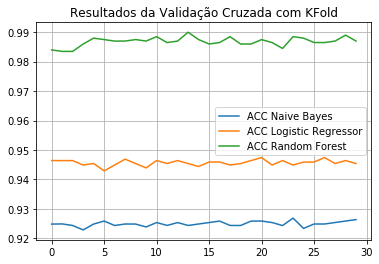

In [10]:
plt.plot(list(range(0, 30)), results_nb_kfold, label='ACC Naive Bayes')
plt.plot(list(range(0, 30)), results_lr_kfold, label='ACC Logistic Regressor')
plt.plot(list(range(0, 30)), results_rf_kfold, label='ACC Random Forest')
plt.title('Resultados da Validação Cruzada com KFold')
plt.legend()
plt.grid();

## Média da Acurácia

In [11]:
print(f'Naive Bayes: {cls_stats.mean(results_nb)}')
print(f'Logistic Regressor: {cls_stats.mean(results_lr)}')
print(f'Random Forest: {cls_stats.mean(results_rf)}')

Naive Bayes: 0.9260833333333333
Logistic Regressor: 0.9449666666666668
Random Forest: 0.9863500000000001


### KFold

In [12]:
print(f'Naive Bayes: {cls_stats.mean(results_nb_kfold)}')
print(f'Logistic Regressor: {cls_stats.mean(results_lr_kfold)}')
print(f'Random Forest: {cls_stats.mean(results_rf_kfold)}')

Naive Bayes: 0.9249859296482411
Logistic Regressor: 0.9456841708542714
Random Forest: 0.986796733668342


## Moda da Acurácia

In [13]:
print(f'Naive Bayes: {cls_stats.mode(results_nb)}')
print(f'Logistic Regressor: {cls_stats.mode(results_lr)}')
print(f'Random Forest: {cls_stats.mode(results_rf)}')

Naive Bayes: (array([0.9245 , 0.92525, 0.92625, 0.92825, 0.929  ]), 2)
Logistic Regressor: (array([0.947]), 3)
Random Forest: (array([0.9875]), 4)


### KFold

In [14]:
print(f'Naive Bayes: {cls_stats.mode(results_nb_kfold)}')
print(f'Logistic Regressor: {cls_stats.mode(results_lr_kfold)}')
print(f'Random Forest: {cls_stats.mode(results_rf_kfold)}')

Naive Bayes: (array([0.92588442]), 3)
Logistic Regressor: (array([0.94491206]), 3)
Random Forest: (array([0.98598492, 0.98748492]), 2)


## Mediana da Acurácia

In [15]:
print(f'Naive Bayes: {cls_stats.median(results_nb)}')
print(f'Logistic Regressor: {cls_stats.median(results_lr)}')
print(f'Random Forest: {cls_stats.median(results_rf)}')

Naive Bayes: 0.9261250000000001
Logistic Regressor: 0.9450000000000001
Random Forest: 0.9865


### KFold

In [16]:
print(f'Naive Bayes: {cls_stats.median(results_nb_kfold)}')
print(f'Logistic Regressor: {cls_stats.median(results_lr_kfold)}')
print(f'Random Forest: {cls_stats.median(results_rf_kfold)}')

Naive Bayes: 0.9248881909547738
Logistic Regressor: 0.9456608040201004
Random Forest: 0.9869773869346734


## Variância da Acurácia

In [17]:
print(f'Naive Bayes: {cls_stats.variance(results_nb)}')
print(f'Logistic Regressor: {cls_stats.variance(results_lr)}')
print(f'Random Forest: {cls_stats.variance(results_rf)}')

Naive Bayes: 1.1576388888888818e-05
Logistic Regressor: 1.1911388888888922e-05
Random Forest: 2.219166666666588e-06


### KFold

In [18]:
print(f'Naive Bayes: {cls_stats.variance(results_nb_kfold)}')
print(f'Logistic Regressor: {cls_stats.variance(results_lr_kfold)}')
print(f'Random Forest: {cls_stats.variance(results_rf_kfold)}')

Naive Bayes: 7.058877301078126e-07
Logistic Regressor: 9.351443776673137e-07
Random Forest: 2.230344498876316e-06


In [19]:
np.min([cls_stats.variance(results_nb), cls_stats.variance(results_lr), cls_stats.variance(results_rf)])

2.219166666666588e-06

### KFold

In [20]:
np.min([cls_stats.variance(results_nb_kfold), cls_stats.variance(results_lr_kfold), cls_stats.variance(results_rf_kfold)])

7.058877301078126e-07

In [21]:
np.max([cls_stats.variance(results_nb), cls_stats.variance(results_lr), cls_stats.variance(results_rf)])

1.1911388888888922e-05

### KFold

In [22]:
np.max([cls_stats.variance(results_nb_kfold), cls_stats.variance(results_lr_kfold), cls_stats.variance(results_rf_kfold)])

2.230344498876316e-06

## Desvio Padrão da Acurácia

In [23]:
print(f'Naive Bayes: {cls_stats.std_deviation(results_nb)}')
print(f'Logistic Regressor: {cls_stats.std_deviation(results_lr)}')
print(f'Random Forest: {cls_stats.std_deviation(results_rf)}')

Naive Bayes: 0.003402409277098923
Logistic Regressor: 0.003451288004338224
Random Forest: 0.001489686767970565


### KFold

In [24]:
print(f'Naive Bayes: {cls_stats.std_deviation(results_nb_kfold)}')
print(f'Logistic Regressor: {cls_stats.std_deviation(results_lr_kfold)}')
print(f'Random Forest: {cls_stats.std_deviation(results_rf_kfold)}')

Naive Bayes: 0.000840171250464935
Logistic Regressor: 0.0009670286333233953
Random Forest: 0.0014934337946076873


## Coeficiente de Variação da Acurácia

In [25]:
print(f'Naive Bayes: {cls_stats.coef_deviation(results_nb)}')
print(f'Logistic Regressor: {cls_stats.coef_deviation(results_lr)}')
print(f'Random Forest: {cls_stats.coef_deviation(results_rf)}')

Naive Bayes: 0.367397744310151
Logistic Regressor: 0.36522854467581467
Random Forest: 0.15103023956714806


### KFold

In [26]:
print(f'Naive Bayes: {cls_stats.coef_deviation(results_nb_kfold)}')
print(f'Logistic Regressor: {cls_stats.coef_deviation(results_lr_kfold)}')
print(f'Random Forest: {cls_stats.coef_deviation(results_rf_kfold)}')

Naive Bayes: 0.0908307060178137
Logistic Regressor: 0.10225703920261696
Random Forest: 0.15134158268400022


### O Random Forest se mostrou mais consistente nos principais quesitos avaliados, apesar de resultar numa variância e num desvio padrão maiores, a média, a moda e a mediana da acurácia dos 30 testes estão acima de 98,5%.